<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utilities-(Copied-from-Starter-File)" data-toc-modified-id="Utilities-(Copied-from-Starter-File)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utilities (Copied from Starter File)</a></span><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#PlotMap" data-toc-modified-id="PlotMap-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PlotMap</a></span></li></ul></li><li><span><a href="#Load-Pickled-Sample-Data" data-toc-modified-id="Load-Pickled-Sample-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Pickled Sample Data</a></span><ul class="toc-item"><li><span><a href="#Map" data-toc-modified-id="Map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Map</a></span></li><li><span><a href="#Warehouse-Location" data-toc-modified-id="Warehouse-Location-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warehouse Location</a></span></li><li><span><a href="#Customer-Locations" data-toc-modified-id="Customer-Locations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Customer Locations</a></span></li><li><span><a href="#Delivery-Schedule" data-toc-modified-id="Delivery-Schedule-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Delivery Schedule</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Finding-the-Shortest-Past" data-toc-modified-id="Finding-the-Shortest-Past-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding the Shortest Past</a></span><ul class="toc-item"><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Algorithm</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testing</a></span></li></ul></li><li><span><a href="#Finding-Shortest-Delivery-Route" data-toc-modified-id="Finding-Shortest-Delivery-Route-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding Shortest Delivery Route</a></span><ul class="toc-item"><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Algorithm</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><span><a href="#Random-Sample" data-toc-modified-id="Random-Sample-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Random Sample</a></span></li><li><span><a href="#Delivering-to-all-Customers" data-toc-modified-id="Delivering-to-all-Customers-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Delivering to all Customers</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import pulp
import math
import random
import pandas as pd
import numpy as np

# Utilities (Copied from Starter File)

## Points and Distances

In [2]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## PlotMap

In [3]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=9,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [4]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Location

This is a blind random generation as it would be needed for a Monte-Carlo Optimisation.
You may improve this algorithm to reduce the search space.

In [5]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

# Load Pickled Sample Data

In [6]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [7]:
random.seed(9999)
W = generateWarehouseLocation(M)

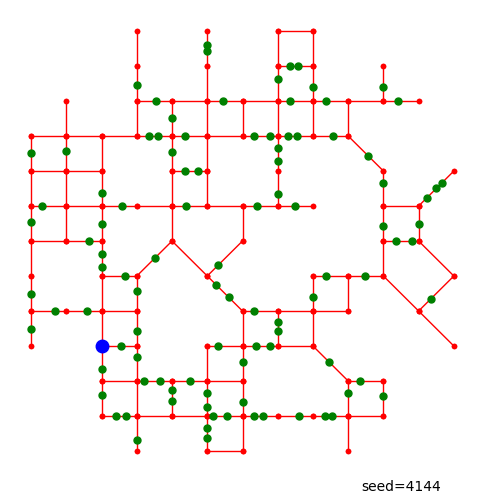

In [8]:
plotMap(M, T=C, P=[], W=W, text="seed=4144")

# Finding the Shortest Past

## The Algorithm

This is the $A^{*}$ algorithm introduced in Week 3.

In [9]:
def pathLength(P):
    return 0 if len(P)<=1 else \
            dist(P[0], P[1])+pathLength(P[1:])

In [10]:
def shortestPath(M, A, B):

    def h(p): 
        return pathLength(p)+dist(p[-1],B)
    
    # candidates C are pairs of the path so far and 
    # the heuristic function of that path, 
    # sorted by the heuristic function, as maintained by
    # insert function
    def insert(C, p):
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1]>hp:
                return C[:i]+[c]+C[i:]
        return C+[c]   
        
    V, E = M
    assert(A in V and B in V)    
    C = insert([], [A])

    while len(C)>0:
        # take the first candidate out of the list of candidates
        path, _ = C[0]
        C = C[1:]
        if path[-1]==B:
            return path
        else:
            for (x, y) in E:
                if path[-1]==x and y not in path:
                    C = insert(C, path+[y])
                elif path[-1]==y and x not in path:
                    C = insert(C, path+[x])
    return None

## Testing

In [11]:
A = C[0]
B = C[-1]

In [12]:
MAB = addTargets(M, [A, B])

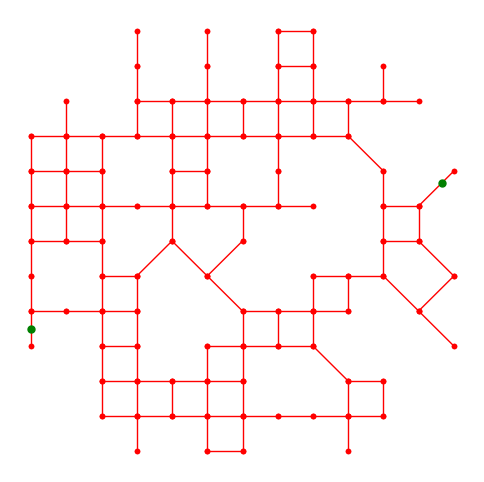

In [13]:
plotMap(MAB, T=[A, B])

In [14]:
P = shortestPath(MAB, A, B)

In [15]:
P

[(640, 2591),
 (640, 2880),
 (1200, 2880),
 (1760, 2880),
 (2320, 2880),
 (2320, 3440),
 (2880, 4000),
 (3440, 3440),
 (4000, 2880),
 (4560, 2880),
 (5120, 2880),
 (5120, 3440),
 (5680, 3440),
 (6240, 3440),
 (6240, 4000),
 (6240, 4560),
 (6800, 4560),
 (7175, 4935)]

In [16]:
pathLength(P)

9912

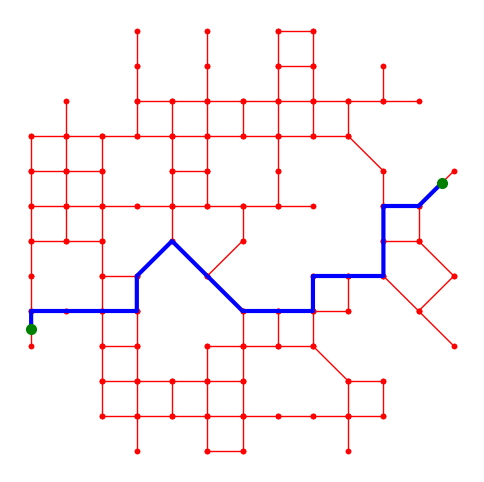

In [17]:
plotMap(MAB, T=[A, B], P=P)

# Finding Shortest Delivery Route

## Iterative Integer Programming

In [11]:
def createTables(M, T):

    def reverse(P):
        return [ P[-i] for i in range(1,len(P)+1) ]
    
    def index(x, L):
        for i in range(len(L)):
            if x==L[i]: 
                return i
        return None

    n = len(T)
    d = [ [ math.inf for t in T ] for t in T ]
    p = [ [ None for t in T ] for t in T ]
    for i in range(n):
        d[i][i] = 0
        p[i][i] = [ T[i] ]
    for i in range(n):
        for j in range(n):
            if p[i][j] is None:
                s = shortestPath(M, T[i], T[j])
                d[i][j] = d[j][i] = pathLength(s)
                p[i][j] = s
                p[j][i] = reverse(s)
                for m in range(len(s)-1):
                    smi = index(s[m], T)
                    if smi is None:
                        continue
                    for l in range(m+1, len(s)):
                        sli = index(s[l], T)
                        if sli is None:
                            continue  
                        sub = s[m:l+1]
                        if p[smi][sli] is None:
                            p[smi][sli] = sub
                            p[sli][smi] = reverse(sub)
                            d[smi][sli] = d[sli][smi] = pathLength(sub)
    return d,p               

In [12]:
def roundtrips(x, n):
    
    def isElem(x, l):
        for i in range(len(l)):
            if l[i]==x:
                return True
        return False

    def startpoint(trips):
        for i in range(n):
            for t in trips:
                if isElem(i, t):
                    break
            else:
                return i
    
    def totalLength(trips):
        s=0
        for i in range(0, len(trips)):
            s += len(trips[i])-1
        return s

    trips = []
    while totalLength(trips)<n:
        start = startpoint(trips)
        trip = [ start ]
        i = start
        while len(trip) < n-totalLength(trips):
            for j in range(0, n):
                if pulp.value(x[i][j])==1:
                    trip.append(j)
                    i=j
                    break        
            if pulp.value(x[trip[-1]][start])==1:
                trip.append(start)
                break
        trips.append(trip)
    return sorted(trips, key=lambda t: len(t), reverse=True)

In [13]:
import time

def createLoop(M, T, timing=False):
    
    if timing:
        start_time = last_time = time.time()
        
    D, P = createTables(M, T)   # These are the distances between customers and warehouse only
    
    if timing:
        print(f"createTables:   {time.time()-start_time:6.2f}s")
        last_time = time.time()
        
    n = len(T)
    # create variables
    x = pulp.LpVariable.dicts("x", ( range(n), range(n) ),
                            lowBound=0, upBound=1, cat=pulp.LpInteger)
    # create problem
    prob = pulp.LpProblem("Loop",pulp.LpMinimize)
    # add objective function
    prob += pulp.lpSum([ D[i][j]*x[i][j] 
                             for i in range(n) for j in range(n) ])
    # add constraints
    constraints=0
    for j in range(n):
        prob += pulp.lpSum([ x[i][j] for i in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        prob += pulp.lpSum([ x[i][j] for j in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        for j in range(n):
            if i!=j:
                prob += x[i][j]+x[j][i] <= 1
                constraints += 1
    # initialise solver
    solvers = pulp.listSolvers(onlyAvailable=True)
    solver = pulp.getSolver(solvers[0], msg=0)
    prob.solve(solver)

    if timing:
        print(f"Solver:         {time.time()-last_time:6.2f}s {constraints:6,d} Constraints")
        last_time = time.time()
        
    trips = roundtrips(x, n)
    while len(trips)>1:
        longest = max([ len(t) for t in trips ])
        for t in trips:
            if len(t)<longest:
                prob += pulp.lpSum([ x[t[i]][t[i+1]] + x[t[i+1]][t[i]]
                                        for i in range(0,len(t)-1) ]) <= len(t)-2
                constraints += 1
            else:
                longest = math.inf
        prob.solve(solver)
        
        if timing:
            print(f"Solver:         {time.time()-last_time:6.2f}s {constraints:6,d} Constraints")
            last_time = time.time()

        trips = roundtrips(x, n)
    trip = trips[0]
    # print(trip)
    loop = []
    for k in range(len(trip)-1):
        sub = P[trip[k]][trip[k+1]]
        loop += sub if len(loop)==0 else sub[1:]
        
    if timing:
        print(f"createLoop:     {time.time()-start_time:6.2f}s")

    return loop

## Heuristic Solution

In [14]:
def FW(M):
    
    V, E = M

    n = len(V)
    d = [ [ math.inf for j in range(n) ] for i in range(n) ]
    p = [ [ None for j in range(n) ] for i in range(n) ]

    for (A, B) in E:
        a = V.index(A)
        b = V.index(B)
        d[a][b] = d[b][a] = dist(A, B)
        p[a][b] = [A, B]
        p[b][a] = [B, A]
    
    for i in range(n):
        d[i][i] = 0
        p[i][i] = [V[i]]
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dk = d[i][k] + d[k][j]
                if d[i][j] > dk:
                    d[i][j] = dk
                    p[i][j] = p[i][k][:-1] + p[k][j]
                    
    return d, p

### Greedy Algorithm

In [23]:
def createLoopG(M, T, plot=False, timing=False):
    
    def makeLoop(L):
        loop = []
        for i in range(len(L)-1):
            A = L[i]
            B = L[i+1]
            a = V.index(A)
            b = V.index(B)
            sub = P[a][b]
            loop += sub if len(loop)==0 else sub[1:]
        return loop

    if timing:
        start_time = time.time()
        
    V, E = M
    D, P = FW(M)   # note these are the distances between all vertices in M (and T)
    
    if timing:
        print(f"Floyd-Warshall: {time.time()-start_time:6.2f}s")
        
    W = T[0]
    customers = T[1:]
    if len(T)==1:
        L = T
    elif len(T)<=3:
        L = T + [T[0]]
    else:
        L = T[:3]+[T[0]]
        T = T[3:]
        while len(T)>0:
            if plot:
                loop = makeLoop(L)
                plotMap(M, T=L, P=loop, w=W, 
                        grid=True, text=f"{pathLength(loop):,d}m")
            minExt = math.inf
            minInd = None
            selInd = None
            for k in range(len(T)):
                C = T[k]
                c = V.index(C)
                for i in range(0, len(L)-1):
                    A = L[i]
                    B = L[i+1]
                    a = V.index(A)
                    b = V.index(B)
                    ext = D[a][c] + D[c][b] - D[a][b]
                    if ext<minExt:
                        minExt, minInd, selInd = ext, i+1, k
            L = L[:minInd]+[T[selInd]]+L[minInd:]
            T = T[:selInd]+T[selInd+1:]
            
    if timing:
        print(f"createLoopG:    {time.time()-start_time:6.2f}s")
        
    return makeLoop(L)

### Heuristic Algorithm

This is only the skeleton of the code, i.e. identical to the greedy algorithm given above.
Your task is now to look at the application of the heuristic rules 2 and 3 from week O3, and 
to transsfer the code to improve the quality of the solution.

Rule 2:

<img src='Rule2.png' width='50%'/>

Rule 3:

<img src='Rule3.png' width='50%'/>

In [15]:
def createLoopH(M, T, plot=False, timing=False):
    
    def makeLoop(L):
        loop = []
        for i in range(len(L)-1):
            A = L[i]
            B = L[i+1]
            a = V.index(A)
            b = V.index(B)
            sub = P[a][b]
            loop += sub if len(loop)==0 else sub[1:]
        return loop

    if timing:
        start_time = time.time()
        
    V, E = M
    D, P = FW(M)   # note these are the distances between all vertices in M (and T)
    
    if timing:
        print(f"Floyd-Warshall: {time.time()-start_time:6.2f}s")
        
    W = T[0]
    customers = T[1:]
    if len(T)==1:
        L = T
    elif len(T)<=3:
        L = T + [T[0]]
    else:
        L = T[:3]+[T[0]]
        T = T[3:]
        while len(T)>0:
            if plot:
                loop = makeLoop(L)
                plotMap(M, T=L, P=loop, w=W, 
                        grid=True, text=f"{pathLength(loop):,d}m")
            minExt = math.inf
            minInd = None
            selInd = None
            for k in range(len(T)):
                C = T[k]
                c = V.index(C)
                for i in range(0, len(L)-1):
                    A = L[i]
                    B = L[i+1]
                    a = V.index(A)
                    b = V.index(B)
                    ext = D[a][c] + D[c][b] - D[a][b]
                    if ext<minExt:
                        minExt, minInd, selInd = ext, i+1, k
            L = L[:minInd]+[T[selInd]]+L[minInd:]
            T = T[:selInd]+T[selInd+1:]
            
    if timing:
        print(f"createLoopH:    {time.time()-start_time:6.2f}s")
        
    return makeLoop(L)

## Testing

In [16]:
import pickle
with open('myData.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [17]:
random.seed(4144)
W = generateWarehouseLocation(M)

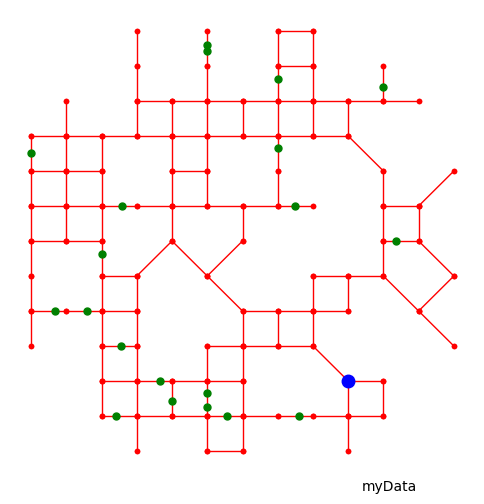

In [18]:
plotMap(M, T=C, P=[], W=W, text="myData")

### Delivery to 10 Customers

In [19]:
random.seed(4144)
T = random.sample(C, k=len(C)//2)

In [20]:
MC = addTargets(M, T)

In [21]:
P = createLoop(MC, [W]+T)

In [24]:
PG = createLoopG(MC, [W]+T)

In [25]:
PH = createLoopH(MC, [W]+T)

In [26]:
W

(5680, 1760)

In [27]:
P

[(5680, 1760),
 (5120, 2320),
 (5120, 2880),
 (5120, 3440),
 (5680, 3440),
 (6240, 3440),
 (6240, 4000),
 (6240, 4560),
 (6240, 5120),
 (5680, 5680),
 (5680, 6240),
 (6240, 6240),
 (6240, 6470),
 (6240, 6240),
 (5680, 6240),
 (5680, 5680),
 (5120, 5680),
 (4560, 5680),
 (4560, 5120),
 (4560, 4560),
 (4834, 4560),
 (4560, 4560),
 (4000, 4560),
 (3440, 4560),
 (2880, 4560),
 (2320, 4560),
 (1760, 4560),
 (1200, 4560),
 (1200, 5120),
 (640, 5120),
 (640, 5415),
 (640, 5120),
 (640, 4560),
 (640, 4000),
 (640, 3440),
 (640, 2880),
 (1014, 2880),
 (1200, 2880),
 (1532, 2880),
 (1760, 2880),
 (1760, 2320),
 (2072, 2320),
 (1760, 2320),
 (1760, 1760),
 (1760, 1200),
 (1986, 1200),
 (2320, 1200),
 (2320, 1760),
 (2682, 1760),
 (2880, 1760),
 (2880, 1433),
 (2880, 1200),
 (3440, 1200),
 (4000, 1200),
 (4560, 1200),
 (4893, 1200),
 (5120, 1200),
 (5680, 1200),
 (5680, 1760)]

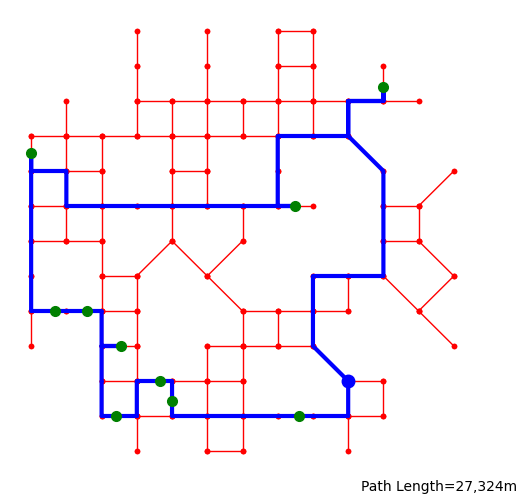

In [28]:
plotMap(MC, T=T, W=W, P=P, text=f"Path Length={pathLength(P):3,d}m")

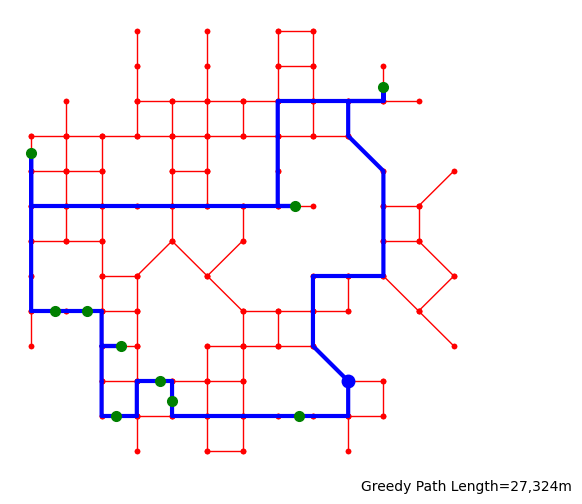

In [29]:
plotMap(MC, T=T, W=W, P=PG, text=f"Greedy Path Length={pathLength(PG):3,d}m")

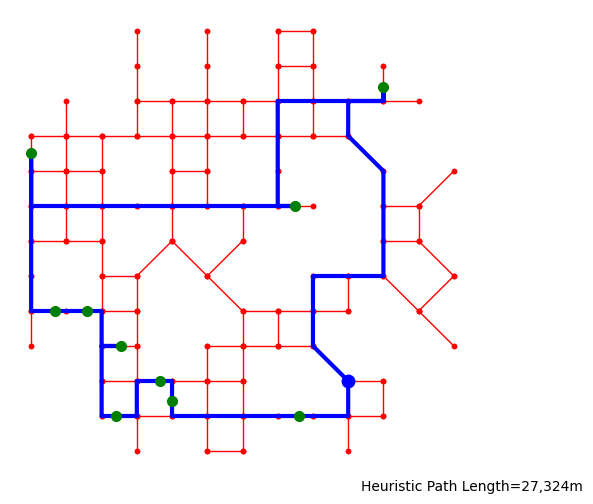

In [30]:
plotMap(MC, T=T, W=W, P=PH, text=f"Heuristic Path Length={pathLength(PH):3,d}m")

In [ ]:
PH.reverse()

In [ ]:
P == PH

### Delivering to all Customers

In [31]:
T = C

In [32]:
MC = addTargets(M, T)

In [33]:
PC = createLoop(MC, [W] + T)

In [34]:
PCG = createLoopG(MC, [W]+T)

In [35]:
PCH = createLoopH(MC, [W]+T)

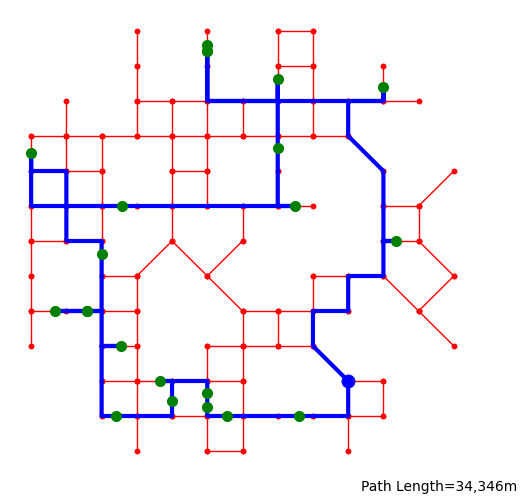

In [36]:
plotMap(MC, T=T, W=W, P=PC, text=f"Path Length={pathLength(PC):3,d}m")

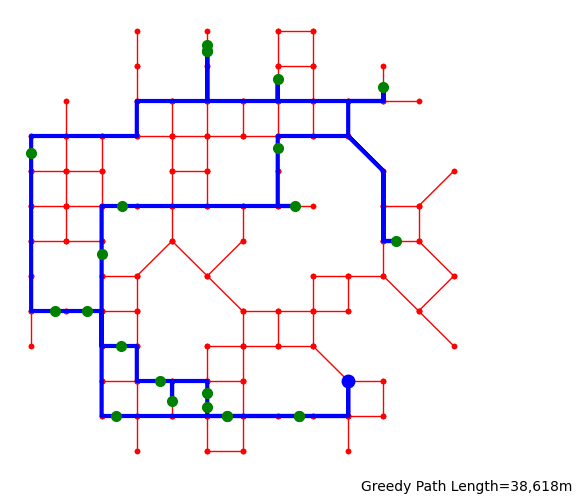

In [37]:
plotMap(MC, T=T, W=W, P=PCG, text=f"Greedy Path Length={pathLength(PCG):3,d}m")

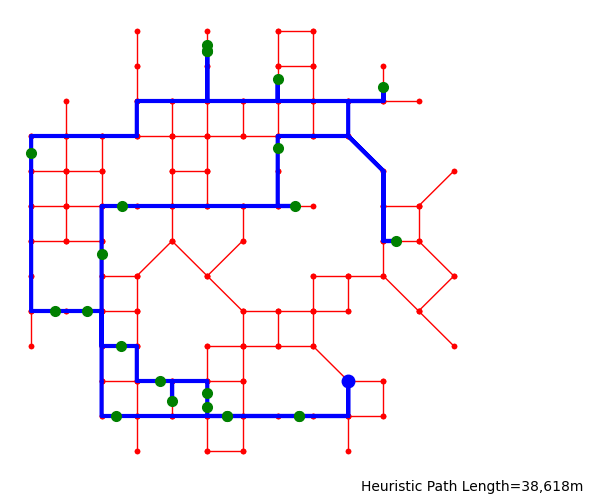

In [38]:
plotMap(MC, T=T, W=W, P=PCH, text=f"Heuristic Path Length={pathLength(PCH):3,d}m")

## Running the Algorithm on Real Data

In [ ]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [ ]:
random.seed(9999)
W1 = generateWarehouseLocation(M)

In [ ]:
len(C)

In [ ]:
random.seed(0)
T = random.sample(C, k=len(C)//5)

In [ ]:
MT = addTargets(M, T)

In [ ]:
plotMap(MT, T=T, W=W1, P=[], text=f"seed=9999")

In [ ]:
P1 = createLoop(MT, [W1]+T, timing=True)

In [ ]:
PG1 = createLoopG(MT, [W1]+T, timing=True)

In [ ]:
PH1 = createLoopH(MT, [W1]+T, timing=True)

In [ ]:
plotMap(MT, T=T, W=W1, P=P1, text=f"Optimal Path Length={pathLength(P1):3,d}m")

In [ ]:
plotMap(MT, T=T, W=W1, P=PG1, text=f"Greedy Path Length={pathLength(PG1):3,d}m")

In [ ]:
plotMap(MT, T=T, W=W1, P=PH1, text=f"Heuristic Path Length={pathLength(PH1):3,d}m")

In [ ]:
random.seed(12)
W2 = generateWarehouseLocation(M)

In [ ]:
plotMap(MT, T=T, W=W2, P=[], text=f"seed=9999")

In [ ]:
P2 = createLoop(MT, [W2]+T, timing=True)

In [ ]:
PG2 = createLoopH(MT, [W2]+T, timing=True)

In [ ]:
PH2 = createLoopH(MT, [W2]+T, timing=True)

In [ ]:
plotMap(MT, T=T, W=W2, P=P2, text=f"Optimal Path Length={pathLength(P2):3,d}m")

In [ ]:
plotMap(MT, T=T, W=W2, P=PG2, text=f"Greedy Path Length={pathLength(PG2):3,d}m")

In [ ]:
plotMap(MT, T=T, W=W2, P=PH2, text=f"Heuristic Path Length={pathLength(PH2):3,d}m")

# Monte-Carlo Optimisation

This is an optimisation for the case of a fixed given number of customers to be served in one loop.

In [41]:
def monte_carlo(M, T, k=math.inf, timing=False, plot=False):
    if timing:
        start_time = time.time()
    V, _ = M
    W = sorted(random.sample(V, k=min(len(V), k)))
    MT = addTargets(M, T)
    minL, minP, minW = math.inf, None, None
    for w in W:
        if minP is not None and w in minP:
            # any point on the current shortest loop will generat the same loop
            continue
        P = createLoop(MT, [w]+T)
        L = pathLength(P)
        if L<minL:
            minL, minP, minW = L, P, w
            print(f"pathlength: {L:6,d}m")
        if timing:
            print(f"     iteration:  {time.time()-start_time:6.2f}s")
    plotMap(MT, T=T, W=minW, P=minP, text=f"seed=4144 Path Length={minL:8.1f}m")
    return minW

pathlength: 35,524m
     iteration:    3.69s
pathlength: 34,418m
     iteration:    6.01s
pathlength: 34,346m
     iteration:    6.81s
     iteration:    8.89s
     iteration:   10.99s
     iteration:   12.62s
     iteration:   13.70s
     iteration:   14.70s
     iteration:   16.35s
     iteration:   19.14s
     iteration:   21.61s
     iteration:   22.39s
     iteration:   23.25s
     iteration:   23.97s
     iteration:   24.68s
     iteration:   25.43s
     iteration:   26.64s
     iteration:   27.55s
     iteration:   28.30s
     iteration:   31.00s
     iteration:   32.97s
     iteration:   33.64s
     iteration:   35.03s
     iteration:   36.22s
     iteration:   37.60s
     iteration:   39.40s
     iteration:   54.67s
     iteration:   55.38s
     iteration:   56.01s
     iteration:   57.96s
     iteration:   58.56s
     iteration:   59.18s
     iteration:   60.54s
     iteration:   61.65s
     iteration:   62.26s
     iteration:   63.73s
     iteration:   65.08s
     iteration:

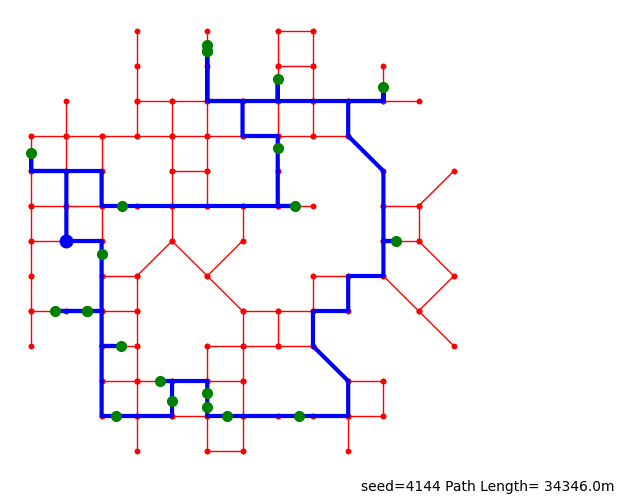

(1200, 4000)

In [42]:
random.seed(4144)
monte_carlo(M, T, timing=True, plot=True)